In [1]:
import sys
sys.path.append('/Users/lindsaybassman/Documents/LBL/ArQTiC')
from arqtic.simulation_generator import Simulation_Generator
import matplotlib.pyplot as plt
import numpy as np
import qiskit as qk
from qiskit import Aer, IBMQ, execute
import random
import qsearch
import scipy.linalg as la

In [8]:
#create simulation object
sim_obj = Simulation_Generator("QITE_input.txt")
N = sim_obj.num_spins

In [9]:
#connect to IBM
#if this is your first run enter your API key
#sim_obj.connect_IBM(api_key="c2629e2a2595c888d4b84e5fc15e8756ccf2e3af6f5eb7525beaee93ce017ecb7581cf3c74c8de44a88b2a554ecc7d82be52ac9e358430de782be155e4586195")

In [10]:
qasm_sim = Aer.get_backend('qasm_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

In [11]:
#generate circuits
sim_obj.generate_programs()

Creating IBM quantum circuit objects...
IBM quantum circuit objects created


In [12]:
#get results
energies = sim_obj.qite_energies

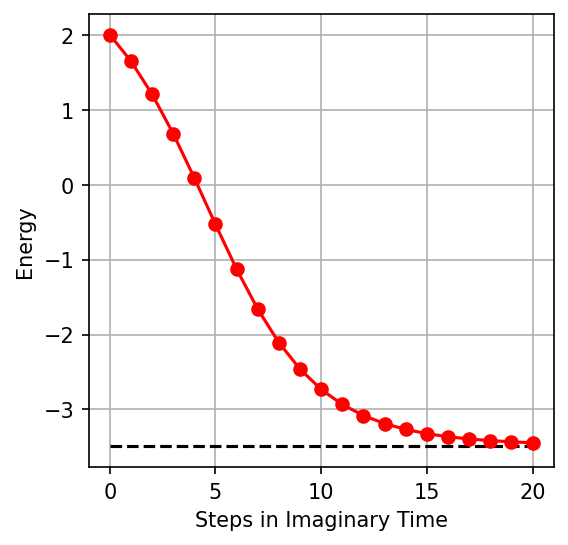

In [18]:
plt.figure(figsize=[4,4], dpi=150)
#plt.plot(np.arange(0,num_beta+1)*dbeta,E,'-ro',label='QITE')
plt.plot(energies,'-ro')
#plt.axhline(y=w[0], color='k',linestyle='--',label="Ground state")
#plt.title("QITE")
plt.xlabel("Steps in Imaginary Time")
plt.ylabel("Energy")
#ground state enegy for Jz=mu_x=1
plt.hlines(-3.493837927970963, 0, 20, color="black", linestyles='dashed') #3qubits Jz=1, mu_x=1


plt.grid()
#plt.xlim(0,10)

#plt.legend(bbox_to_anchor=(1.0,1.0))
#plt.show()
plt.savefig('QITE_GSenergy.png')

In [14]:
ibm_qite_circ = sim_obj.ibm_circuits_list[0]
#print(ibm_qite_circ)
unitary_sim = Aer.get_backend('unitary_simulator')
job = execute(ibm_qite_circ, unitary_sim)
result = job.result()
ibm_qite_unitary = result.get_unitary(ibm_qite_circ, decimals=16)
#print(ibm_qite_unitary)


In [65]:
#Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
sz = np.array([[1, 0], [0, -1]])
Jz = sim_obj.Jz
mu_x = sim_obj.h_ext
hinit = np.zeros((2**N, 2**N), dtype=np.complex128)
#2qubits
#hinit += Jz*np.kron(sz,sz)
#hinit += mu_x*np.kron(sx,np.eye(2))
#hinit += mu_x*np.kron(np.eye(2),sx)
#3qubits
hinit += Jz*np.kron(np.eye(2),np.kron(sz,sz))
hinit += Jz*np.kron(np.kron(sz,sz),np.eye(2))
hinit += mu_x*np.kron(sx,np.kron(np.eye(2),np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(sx,np.eye(2)))
hinit += mu_x*np.kron(np.eye(2),np.kron(np.eye(2),sx))

In [66]:
result = qk.execute(ibm_qite_circ, state_vector_sim).result()
statevector = result.get_statevector(ibm_qite_circ)
eng = np.real(np.dot(np.conj(statevector).transpose(), np.dot(hinit, statevector)))
print(eng)

-3.48981734918272
